In [121]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# Training a linear model

The linear model takes the form of the following equation:

$$\hat{Y} = X^T \hat{\beta}$$

Given the training data, we can find the best $\hat{\beta}$ for the model, minimizing the residual sum of squares:

$$
RSS(\beta) = \sum^{N}_{i=1}(y_i - x_i^T \beta)^2
$$


The optimal can be found differentiating w.r.t $\beta$, and if *$X^TX$* is nonsingular, then the following solution is unique:

$$
\hat{\beta} = (X^T X)^{-1}X^T Y 
$$

## Regression

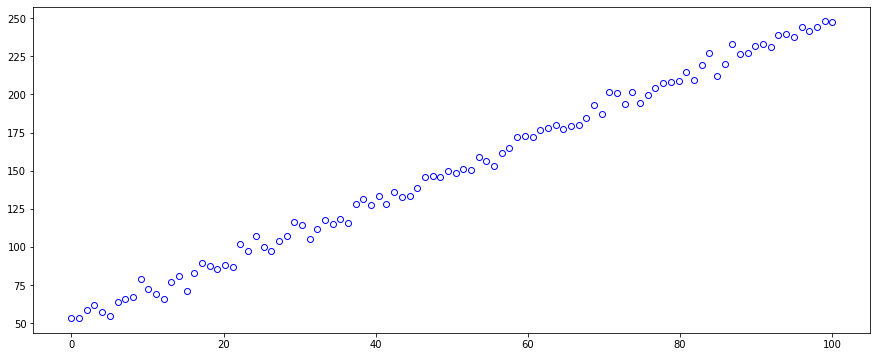

In [240]:
x = np.linspace(0, 100, 100)
y = 50 + 2*x + norm(loc=0, scale=4).rvs(100)

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="white", edgecolor="blue")
plt.show()

In [241]:
x.shape

(100,)

In [242]:
x = np.stack((np.ones(100), x)).T
x.shape

(100, 2)

In [243]:
a = np.dot(x.T, x)
b = np.dot(x.T, y)
b_hat = np.dot(np.linalg.inv(a), b)
b_hat

array([50.15430053,  2.00110256])

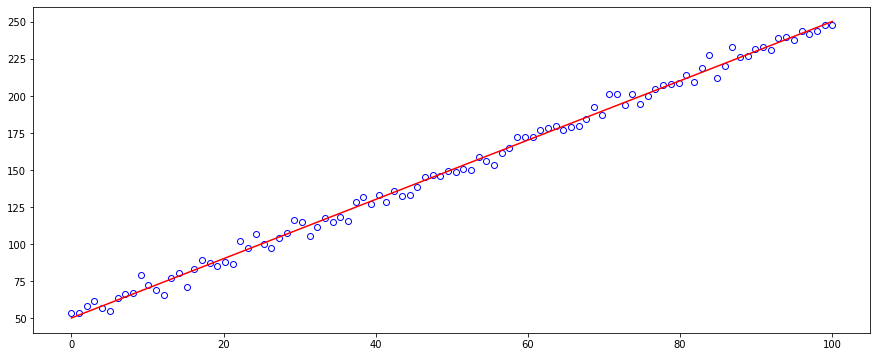

In [244]:
plt.figure(figsize=(15, 6))

plt.scatter(x[:, 1], y, color="white", edgecolor="blue")
plt.plot(x[:, 1], np.dot(x, b_hat), color="red")

plt.show()

## Classification

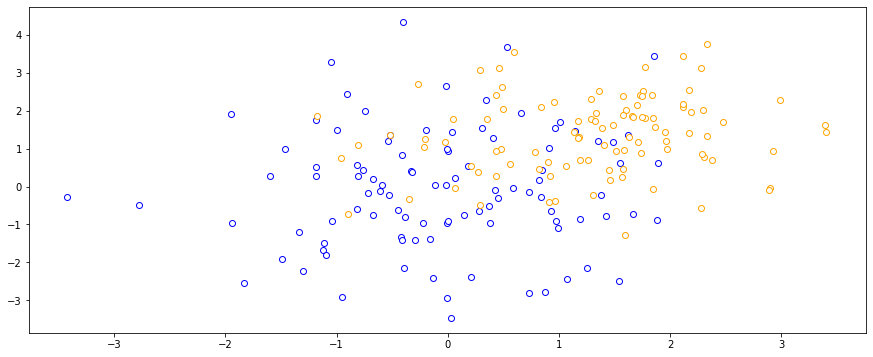

In [269]:
x1 = norm.rvs(loc=0, scale=1, size=100)
x2 = norm.rvs(loc=0, scale=1.5, size=100)

blue = np.append(x1, x2).reshape(2, 100)

x1 = norm.rvs(loc=1.5, scale=1, size=100)
x2 = norm.rvs(loc=1.5, scale=1, size=100)

orange = np.append(x1, x2).reshape(2, 100)

plt.figure(figsize=(15, 6))

plt.scatter(blue[0], blue[1], color="white", edgecolor="blue")
plt.scatter(orange[0], orange[1], color="white", edgecolor="orange")

plt.show()

In [270]:
X = np.concatenate([blue, orange], axis=1).T
X.shape

(200, 2)

In [293]:
X = np.hstack((np.ones(200).reshape(200, 1), X))
X

array([[ 1.00000000e+00, -2.92779872e-01, -1.41689662e+00],
       [ 1.00000000e+00,  5.86689077e-01, -3.11837553e-02],
       [ 1.00000000e+00,  1.48722679e+00,  1.18662402e+00],
       [ 1.00000000e+00,  1.25478664e+00, -2.14419849e+00],
       [ 1.00000000e+00, -9.93974331e-01,  1.49664730e+00],
       [ 1.00000000e+00, -1.95217136e+00,  1.90805531e+00],
       [ 1.00000000e+00, -5.90007722e-01,  4.29159411e-02],
       [ 1.00000000e+00, -1.18425090e+00,  2.90783287e-01],
       [ 1.00000000e+00,  1.35591368e+00,  1.19709593e+00],
       [ 1.00000000e+00,  1.55368085e+00,  6.29100084e-01],
       [ 1.00000000e+00, -7.45527573e-01,  1.98576513e+00],
       [ 1.00000000e+00, -1.68260594e-02,  3.01633063e-02],
       [ 1.00000000e+00, -3.32489283e-01,  4.20524920e-01],
       [ 1.00000000e+00,  1.88249297e+00, -8.76075622e-01],
       [ 1.00000000e+00,  7.31569592e-01, -1.45582182e-01],
       [ 1.00000000e+00, -4.22607165e-03, -9.73575703e-01],
       [ 1.00000000e+00, -1.46510434e+00

In [294]:
Y = np.concatenate([np.ones(100), np.zeros(100)])
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [295]:
a = np.linalg.inv(np.dot(X.T, X))
b = np.dot(X.T, Y)
b_hat = np.dot(a, b)
b_hat

array([ 0.68731911, -0.18984589, -0.10833061])

In [296]:
np.dot(X, b_hat)

array([ 8.96395442e-01,  5.79316760e-01,  2.76427520e-01,  6.81385358e-01,
        7.13888338e-01,  8.51230022e-01,  7.94680542e-01,  8.80643546e-01,
        3.00222347e-01,  3.24208397e-01,  6.13735310e-01,  6.87245862e-01,
        7.04885115e-01,  4.24841370e-01,  5.64204641e-01,  7.93589464e-01,
        8.58899839e-01,  8.35381099e-01,  9.07234818e-01,  4.04415974e-01,
        6.16432340e-01,  5.56679294e-01,  7.84641671e-01,  3.10624523e-01,
        1.86217958e-01,  6.37188177e-01,  1.05622685e+00,  9.82490517e-01,
        5.85080258e-01,  6.71246818e-01,  7.41651896e-01,  7.93600909e-01,
        4.61175926e-01,  4.03696985e-01,  7.47228396e-01,  6.60017246e-01,
        1.17485444e+00,  1.07101204e+00,  2.31176852e-01,  5.95981901e-01,
        8.41625039e-01,  6.16636250e-01,  5.24928010e-01,  1.18524404e+00,
        8.10375628e-01,  5.12427254e-01,  2.93508337e-01,  4.79666256e-01,
        1.16132563e+00,  5.31633233e-01,  3.73183505e-01,  1.00834206e+00,
        6.66525888e-01,  

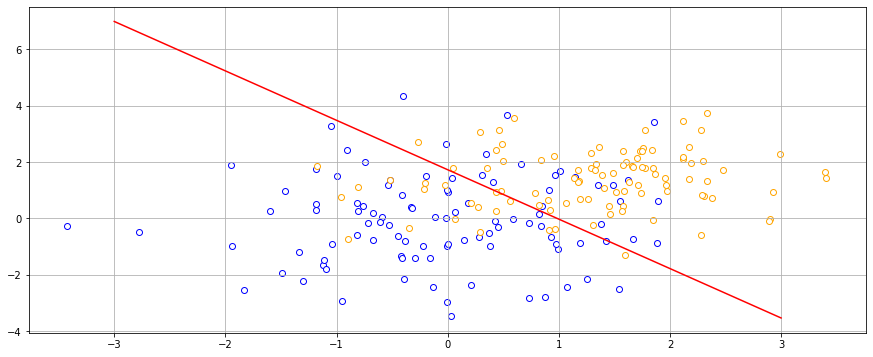

In [309]:
plt.figure(figsize=(15, 6))

plt.scatter(blue[0], blue[1], color="white", edgecolor="blue")
plt.scatter(orange[0], orange[1], color="white", edgecolor="orange")


# 0.5 = b0 + b1*x1 + b2*x2
# x2 = (0.5 - b0 - b1*x1) / b2
t = np.linspace(-3, 3, 100)
plt.plot(t, (0.5 - b_hat[0] - b_hat[1]*t) / b_hat[2], color="red")

plt.grid()
plt.show()

# References

[1] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media. Chapter 2.